In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
# pd.set_option('display.max_colwidth', -1)  # or 199

In [46]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(5,16)
# ylim=(-11, 3.5)

alpha=1
marker='.'
s=1
legend=False
legend_out=False
linewidth=0
x_jitter=0
y_jitter=0
plt.rcParams["figure.figsize"] = (20,20)

In [47]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05), "Significant"] = "FDR<0.05"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [48]:
def plot_MA_s(df, df_name):

    """Plot MA"""
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05"],
                          palette=["black", "blue"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend,
                          legend_out=legend_out)
    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot for {df_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)
    
#     plt.savefig(f"{df_name}.pdf")

In [49]:
def plot_MA(df, df_name):

    """Plot MA"""
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05"],
                          palette=["black", "blue"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot for {df_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)

In [79]:
def merge_df(df_1, df_2, how="inner"):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how=how)
    df["Significant"] = "No"
    return df

In [58]:
def compare(df_1_path, df_2_path, df_1_name, df_2_name, how):
    
    "Combine multiple functions"
    
    df_1 = prepare_df(df_1_path, df_1_name)
    plot_MA_s(df_1, df_1_name)
    df_2 = prepare_df(df_2_path, df_2_name)
    plot_MA(df_2, df_2_name)
    df_merged = merge_df(df_1, df_2, how=how)
    
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant")
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_1_name)
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_2_name)
    
    return df_merged

In [59]:
def plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name):

    df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

    df_all["Significant"] = "No"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0) &
               (df_all[f"logFC_{df_2_name}"]>0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogFC_{df_2_name}>0)"
    
    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0) &
               (df_all[f"logFC_{df_2_name}"]<0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogFC_{df_2_name}<0)"
    print("Significant details:")
    print(pd.DataFrame(df_all["Significant"].value_counts()))
    
    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0)"

    print("\n\nSignificant:")
    print(pd.DataFrame(df_all["Significant"].value_counts()))


    sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                          y=f"logFC_{df_2_name}",
                          data=df_all,
                          fit_reg=False,
                          hue=f"Significant",
                          hue_order=["No", f"FDR_{df_2_name}<0.05", f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0)"],
                          palette=["black", "blue", "red"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend,
                          legend_out = legend_out)


    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)
    
    plt.savefig(f"{df_2_name}__{df_1_name}.pdf")

In [60]:
# Input prefix
csr1_ip_and_double_mutants_prefix = "../../05_csr1_ip_and_wago_double_mutants/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

small_rna_prefix = "../../01_small_RNA_seq_15_C/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

ips_prefix = "../../03_WAGO_IPs/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

csr1_ip_prefix = "../../04_csr_1_IP/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

In [61]:
suffix = "/DE_edgeR/final_table_with_gene_info.tsv"

In [62]:
# Input files

# small_RNAs

small_rna__WT__Dpf_3_null_path = small_rna_prefix + "WT__Dpf_3_null" + suffix
small_rna__WT__Dpf_3_null_name = "Dpf_3_null__over__WT"

small_rna__WT__Dpf_3_S784A_path = small_rna_prefix + "WT__Dpf_3_S784A" + suffix
small_rna__WT__Dpf_3_S784A_name = "Dpf_3_S784A__over__WT"

# small_rna__WT__mut_2_path = small_rna_prefix + "WT__mut_2" + suffix
# small_rna__WT__mut_2_name = "mut_2__over__WT"

# IPs

# WAGO-1
ip__Input_WAGO_1__IP_WAGO_1_path = ips_prefix + "Input_WAGO-1__IP_WAGO-1" + suffix
ip__Input_WAGO_1__IP_WAGO_1_name = "IP_WAGO-1__over__Input_WAGO-1"

# WAGO-1 dpf3-null
ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_path = ips_prefix + "Input_WAGO-1_dpf-3_null__IP_WAGO-1_dpf-3_null" + suffix
ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name = "IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dpf-3_null"

# # WAGO-3
# ip__Input_WAGO_3__IP_WAGO_3_path = ips_prefix + "Input_WAGO-3__IP_WAGO-3" + suffix
# ip__Input_WAGO_3__IP_WAGO_3_name = "IP_WAGO-3__over__Input_WAGO-3"

# # csr-1
ip__csr_1_input__csr_1_IP_path = csr1_ip_prefix + "csr-1_input__csr-1_IP" + suffix
ip__csr_1_input__csr_1_IP_name = "IP_csr-1__over__csr-1_input"

# HW3115: csr-1(gc017[csr-1::3xFLAG::1HA])IV
ip__HW3115_csr_1_input__HW3115_csr_1_IP_path = csr1_ip_and_double_mutants_prefix + "HW3115_INPUT__HW3115_IP" + suffix
ip__HW3115_csr_1_input__HW3115_csr_1_IP_name = "IP_HW3115_csr-1__over__HW3115_csr-1_input"

# HW3128: dpf-3(xe68); csr-1(gc017[csr-1::3xFLAG::1HA])IV
ip__HW3128_csr_1_dpf_3_input__HW3128_csr_1_dpf_3_IP_path = csr1_ip_and_double_mutants_prefix + "HW3128_INPUT__HW3128_IP" + suffix
ip__HW3128_csr_1_dpf_3_input__HW3128_csr_1_dpf_3_IP_name = "IP_HW3128_csr-1_dpf-3__over__HW3128_csr-1_dpf-3_input"

# HW3134: wago-1 [(xe295) Wago-1::FLAG1x]; Wago-3 [(Xe255)Wago-3 P2G A3E]
ip__HW3134_wago_1_wago_3_input__HW3134_wago_1_wago_3_IP_path = csr1_ip_and_double_mutants_prefix + "HW3134_INPUT__HW3134_IP" + suffix
ip__HW3134_wago_1_wago_3_input__HW3134_wago_1_wago_3_IP_name = "IP_HW3134_wago-1_wago-3__over__HW3134_wago-1_wago-3_input"

# HW3135: Wago-1 [(Xe260, xe296)Wago-1 P3G::FLAG]; Wago-3 [(Xe255)Wago-3 P2G A3E]
ip__HW3135_wago_1_wago_3_input__HW3135_wago_1_wago_3_IP_path = csr1_ip_and_double_mutants_prefix + "HW3135_INPUT__HW3135_IP" + suffix
ip__HW3135_wago_1_wago_3_input__HW3135_wago_1_wago_3_IP_name = "IP_HW3135_wago-1_wago-3__over__HW3135_wago-1_wago-3_input"

# Compare csr-1 public and our own

                                                    Significant
FDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0...         5073
No                                                         3282
FDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_...         2956
FDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0...         1538


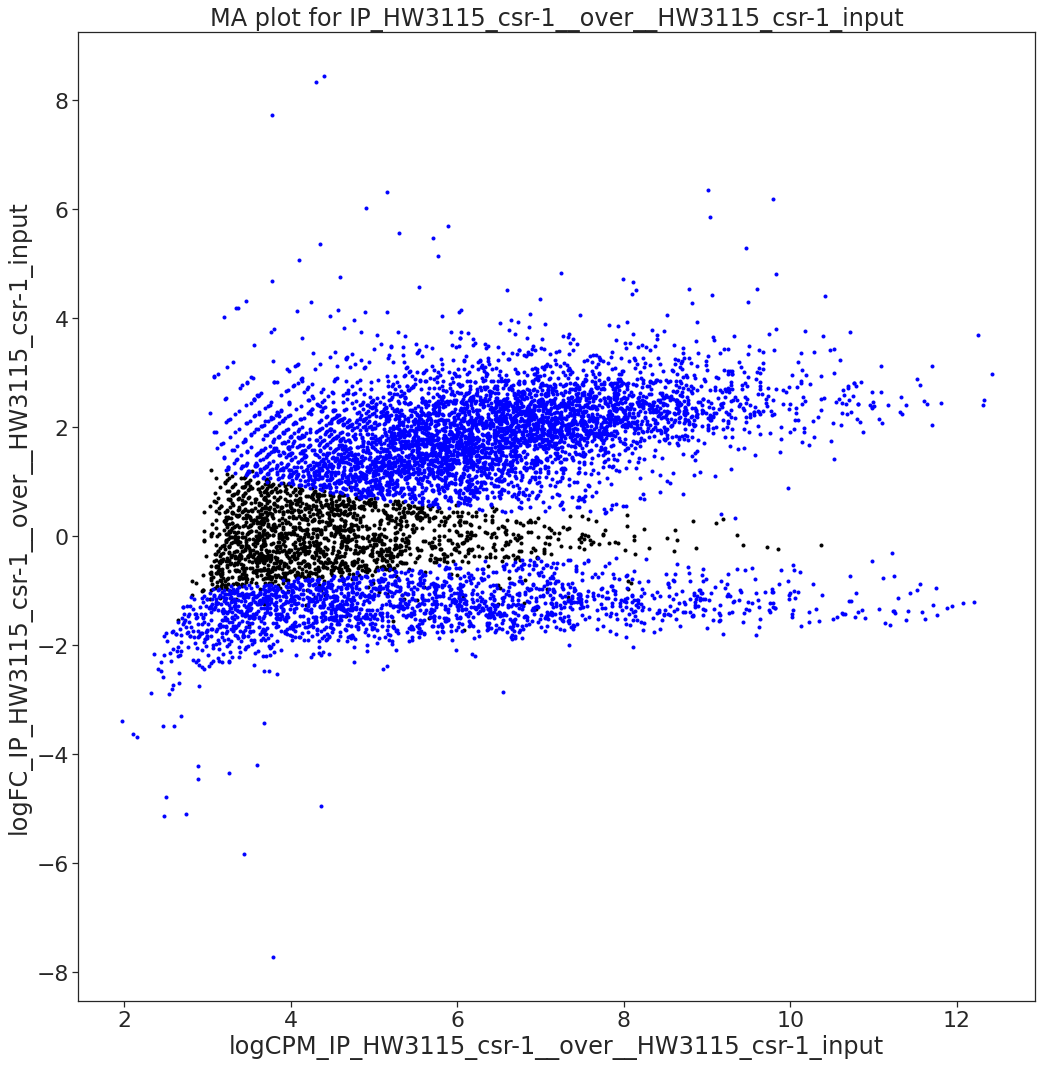

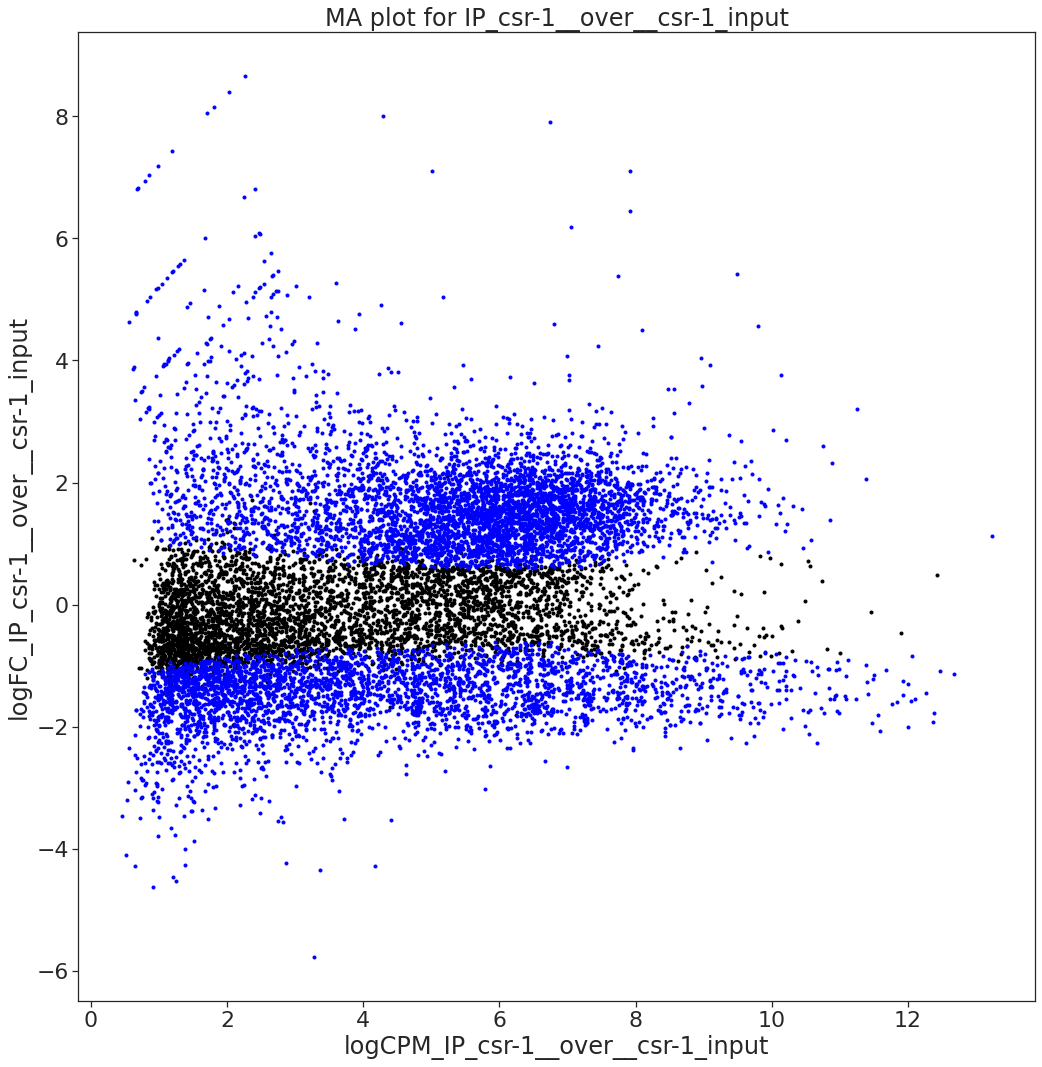

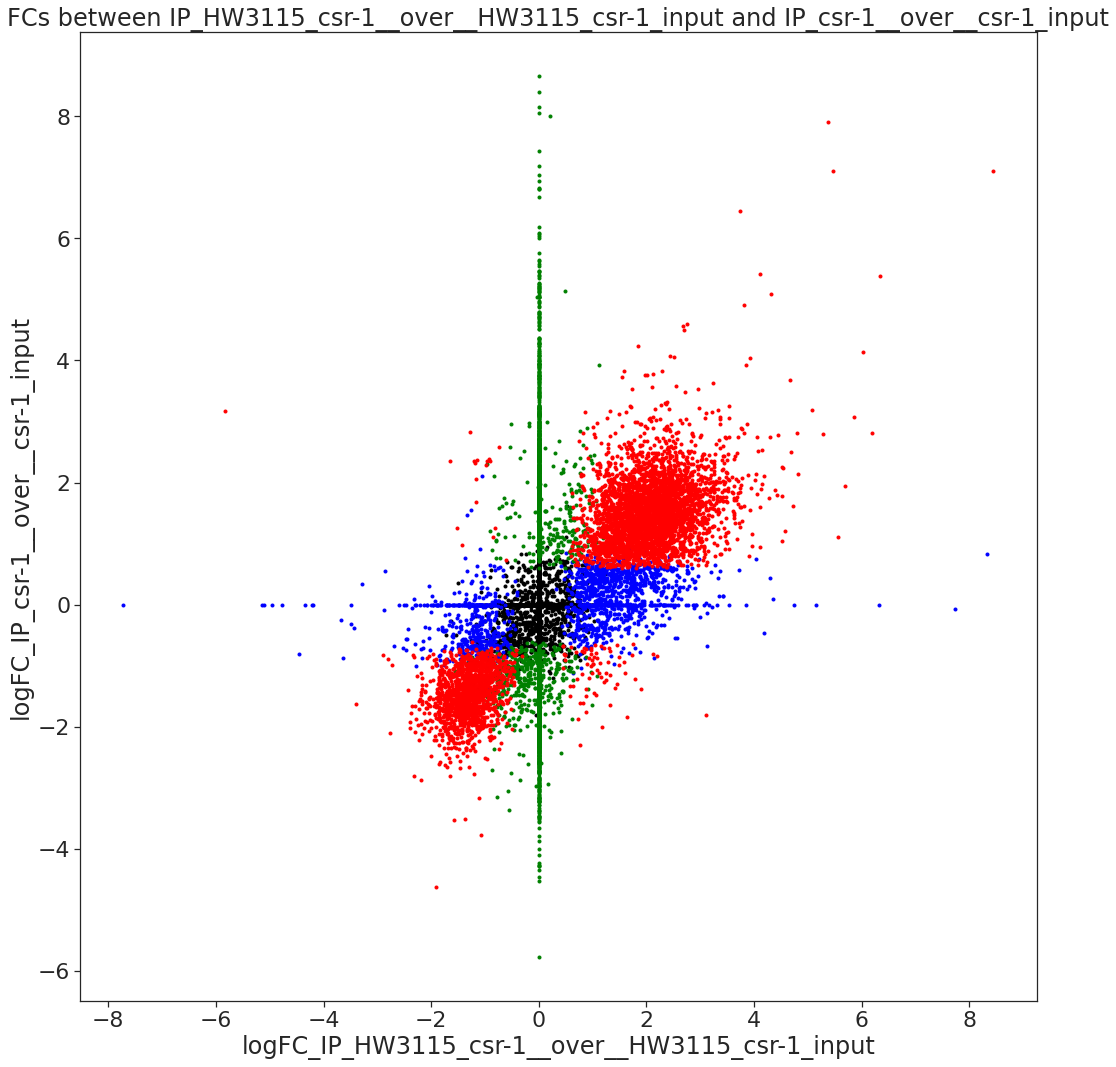

In [63]:
df_1_path = ip__HW3115_csr_1_input__HW3115_csr_1_IP_path
df_1_name = ip__HW3115_csr_1_input__HW3115_csr_1_IP_name

df_2_path = ip__csr_1_input__csr_1_IP_path
df_2_name = ip__csr_1_input__csr_1_IP_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name, how="outer")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05),
#            (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05),
#            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05),
#            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"

df_all.loc[df_all[f"FDR_{df_1_name}"].isna(), f"FDR_{df_1_name}"] = 1
df_all.loc[df_all[f"logFC_{df_1_name}"].isna(), f"logFC_{df_1_name}"] = 0
df_all.loc[df_all[f"FDR_{df_2_name}"].isna(), f"FDR_{df_2_name}"] = 1
df_all.loc[df_all[f"logFC_{df_2_name}"].isna(), f"logFC_{df_2_name}"] = 0

print(pd.DataFrame(df_all["Significant"].value_counts()))

# df_all["Significant"] = "No"

# df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]<0) &
#            (df_all[f"FDR_{df_2_name}"]<0.05) &
#            (df_all[f"logFC_{df_2_name}"]<0),
#             "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"],
                      palette=["black", "blue", "green", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
# sns_plot.set(xlim=xlim, ylim=ylim)


# plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

# print("*"*80)
# print(pd.DataFrame(df_all["Significant"].value_counts()))
# print("*"*80)

                                                    Significant
No                                                         7030
FDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0...         3545
FDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_...         1147
FDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0...         1127


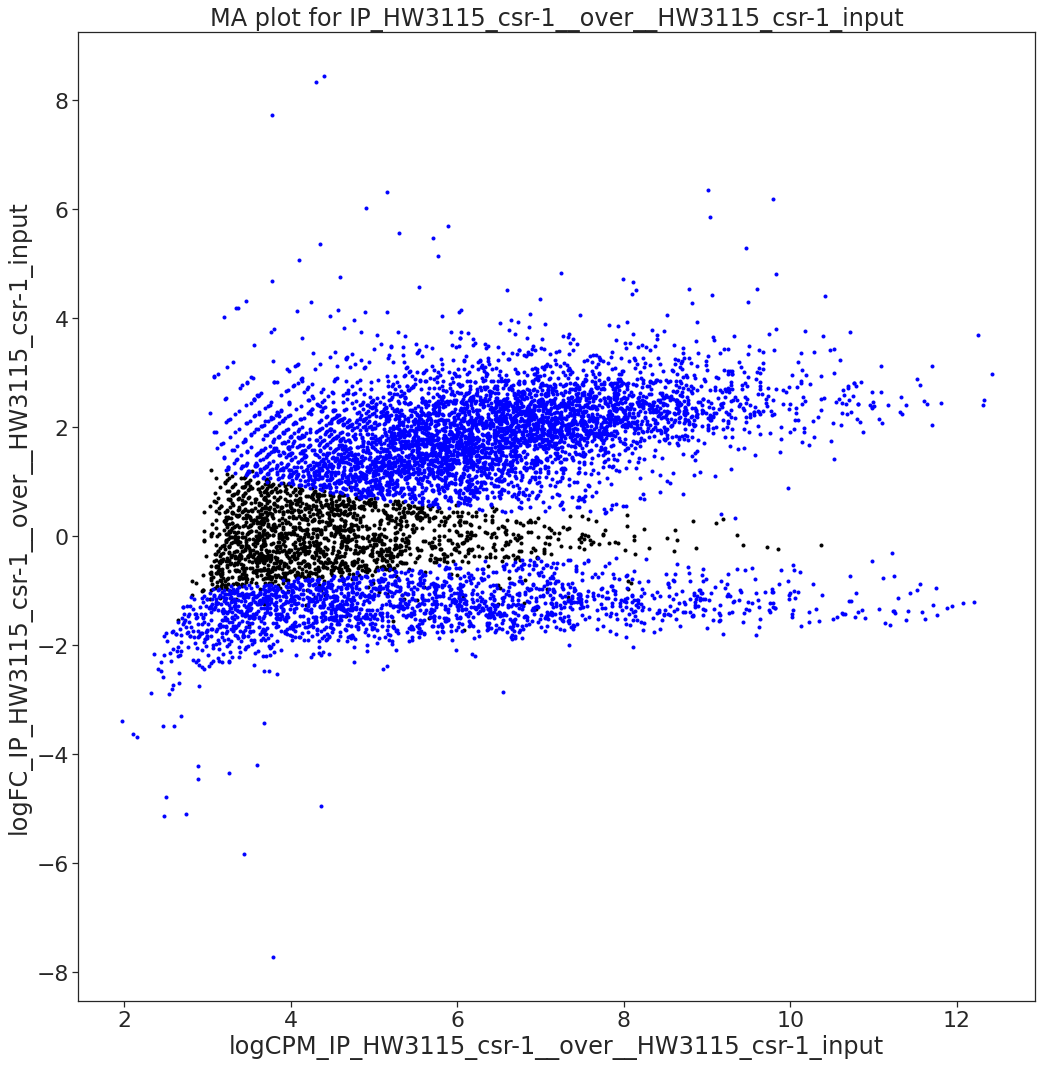

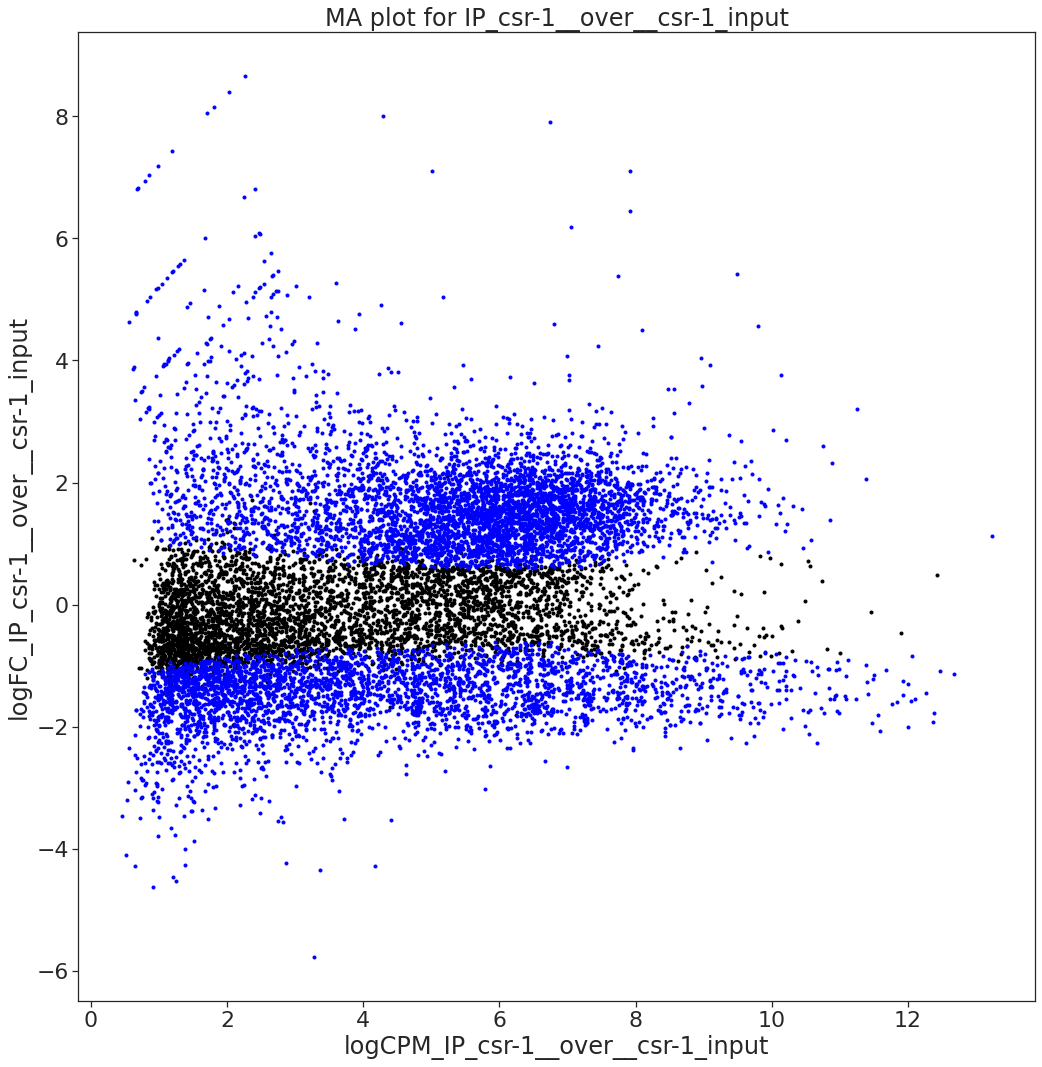

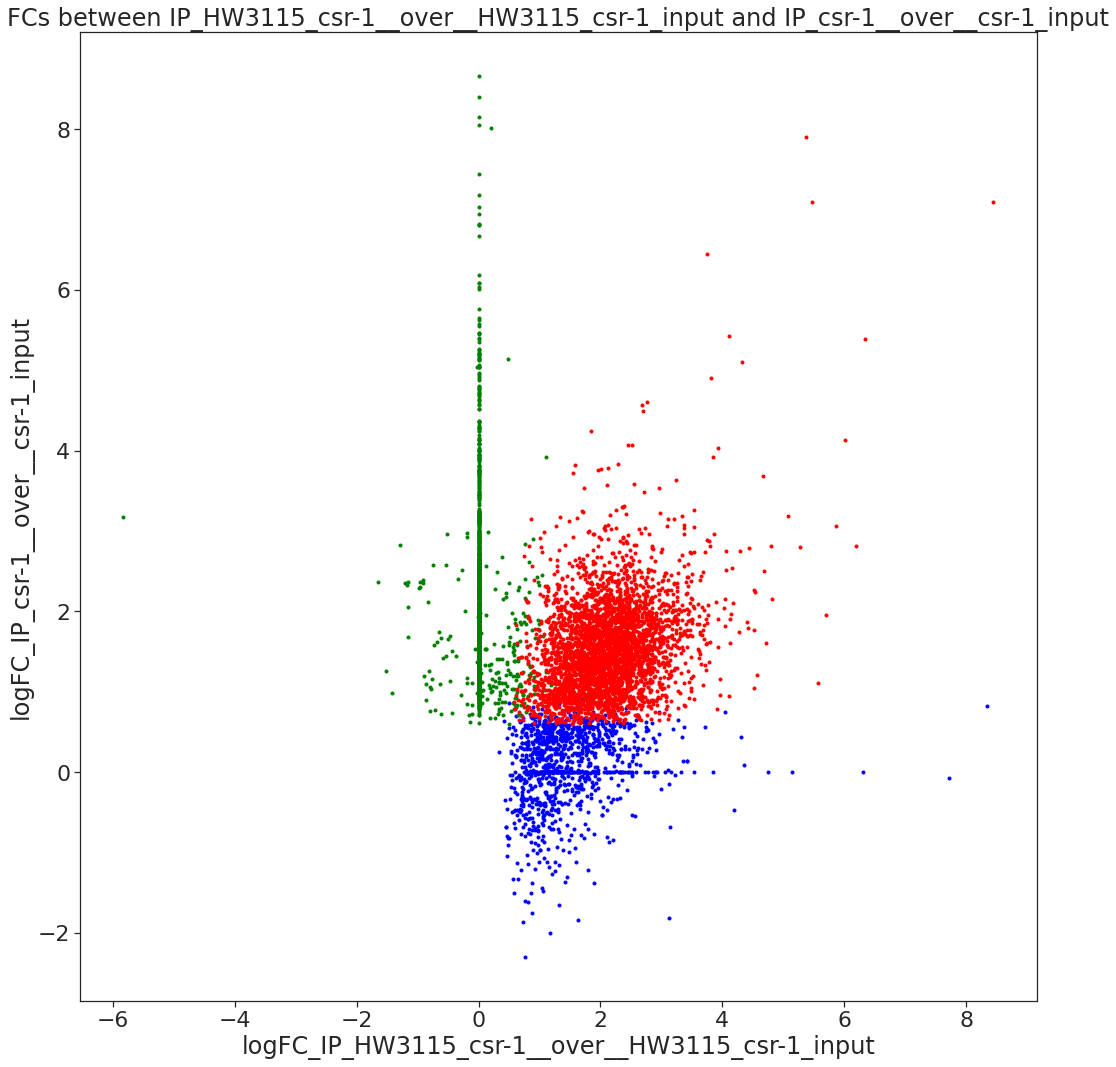

In [74]:
df_1_path = ip__HW3115_csr_1_input__HW3115_csr_1_IP_path
df_1_name = ip__HW3115_csr_1_input__HW3115_csr_1_IP_name

df_2_path = ip__csr_1_input__csr_1_IP_path
df_2_name = ip__csr_1_input__csr_1_IP_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name, how="outer")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"

df_all.loc[df_all[f"FDR_{df_1_name}"].isna(), f"FDR_{df_1_name}"] = 1
df_all.loc[df_all[f"logFC_{df_1_name}"].isna(), f"logFC_{df_1_name}"] = 0
df_all.loc[df_all[f"FDR_{df_2_name}"].isna(), f"FDR_{df_2_name}"] = 1
df_all.loc[df_all[f"logFC_{df_2_name}"].isna(), f"logFC_{df_2_name}"] = 0

print(pd.DataFrame(df_all["Significant"].value_counts()))

# df_all["Significant"] = "No"

# df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]<0) &
#            (df_all[f"FDR_{df_2_name}"]<0.05) &
#            (df_all[f"logFC_{df_2_name}"]<0),
#             "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all[df_all["Significant"] != "No"],
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"],
                      palette=["black", "blue", "green", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
# sns_plot.set(xlim=xlim, ylim=ylim)


# plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

# print("*"*80)
# print(pd.DataFrame(df_all["Significant"].value_counts()))
# print("*"*80)

                                                    Significant
FDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0...         3545
No                                                         3033
FDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0...         1006
FDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_...          231


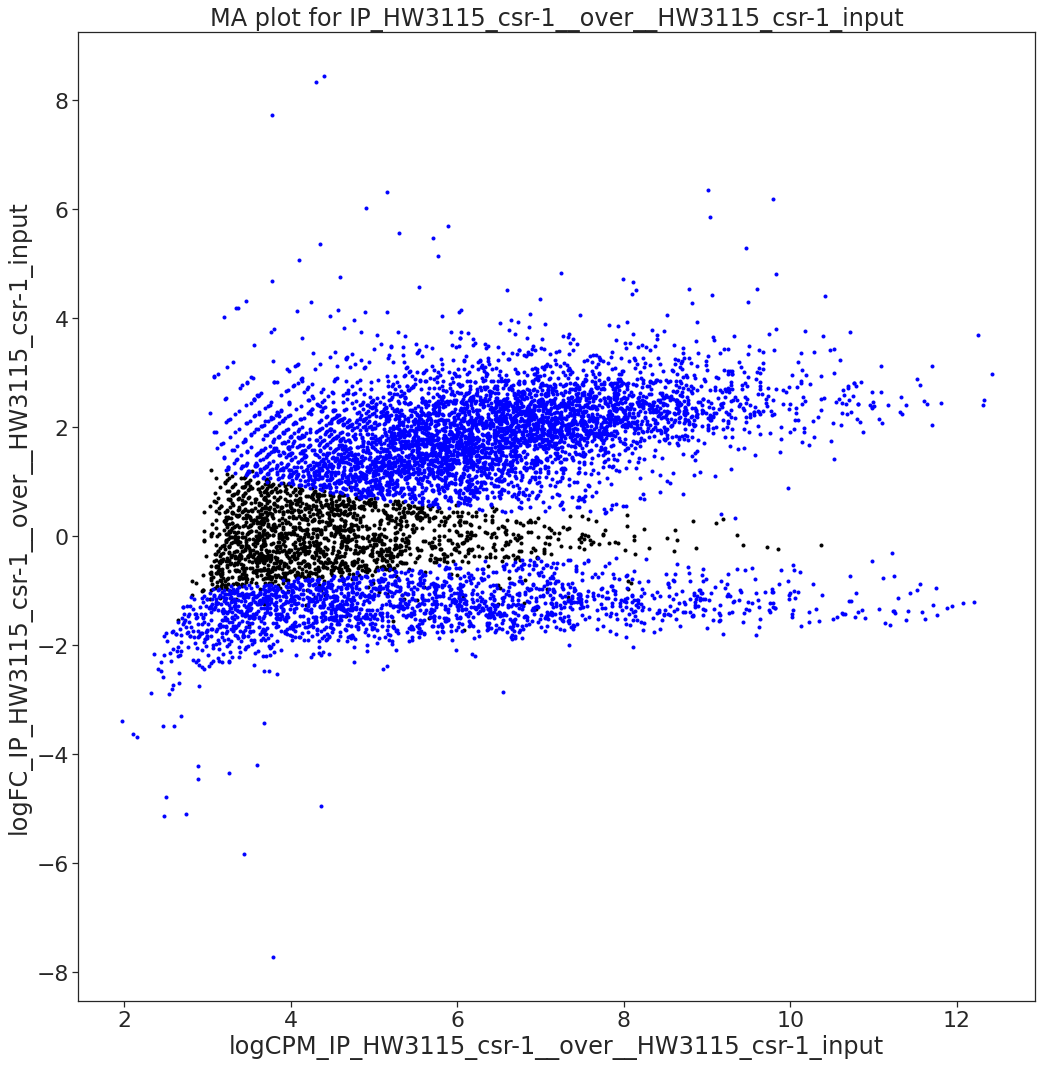

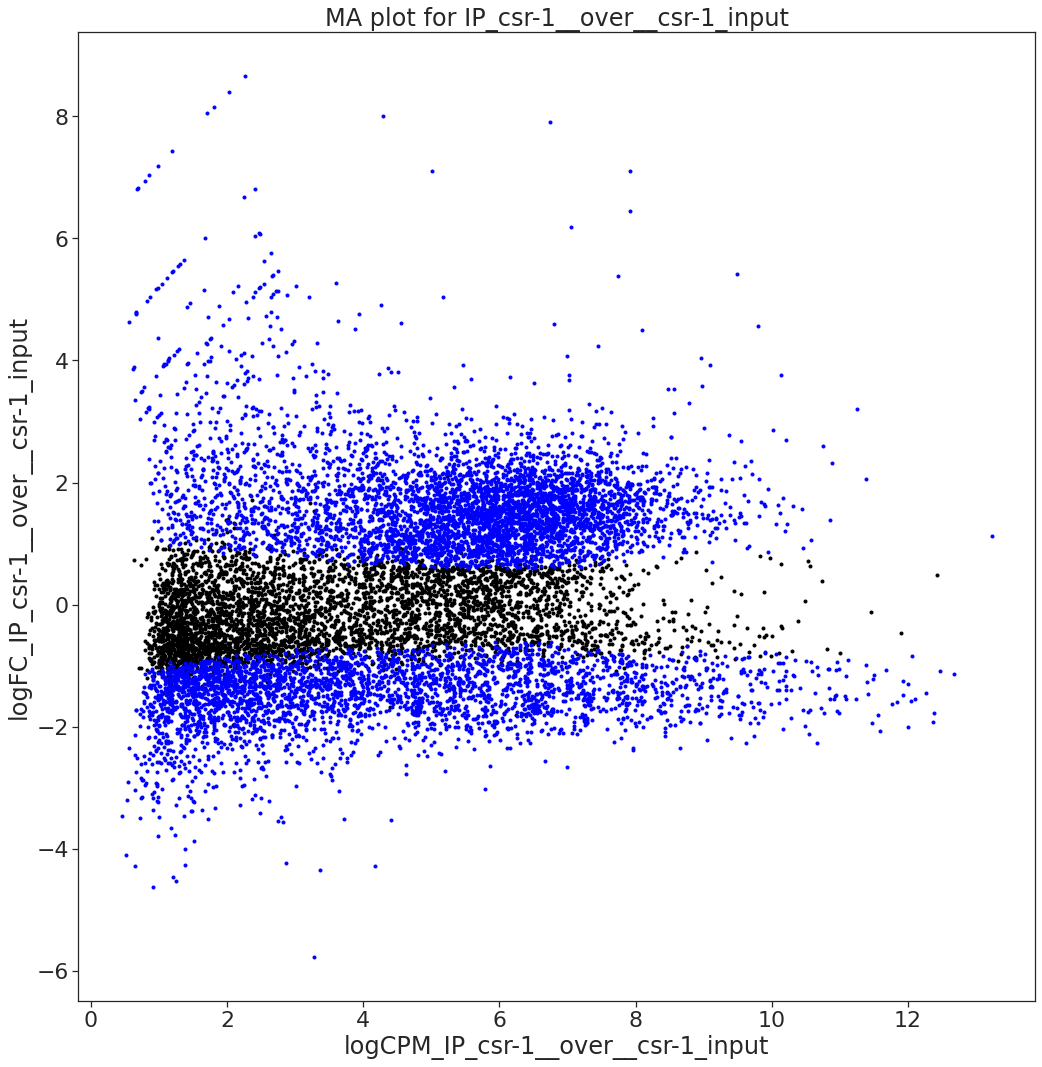

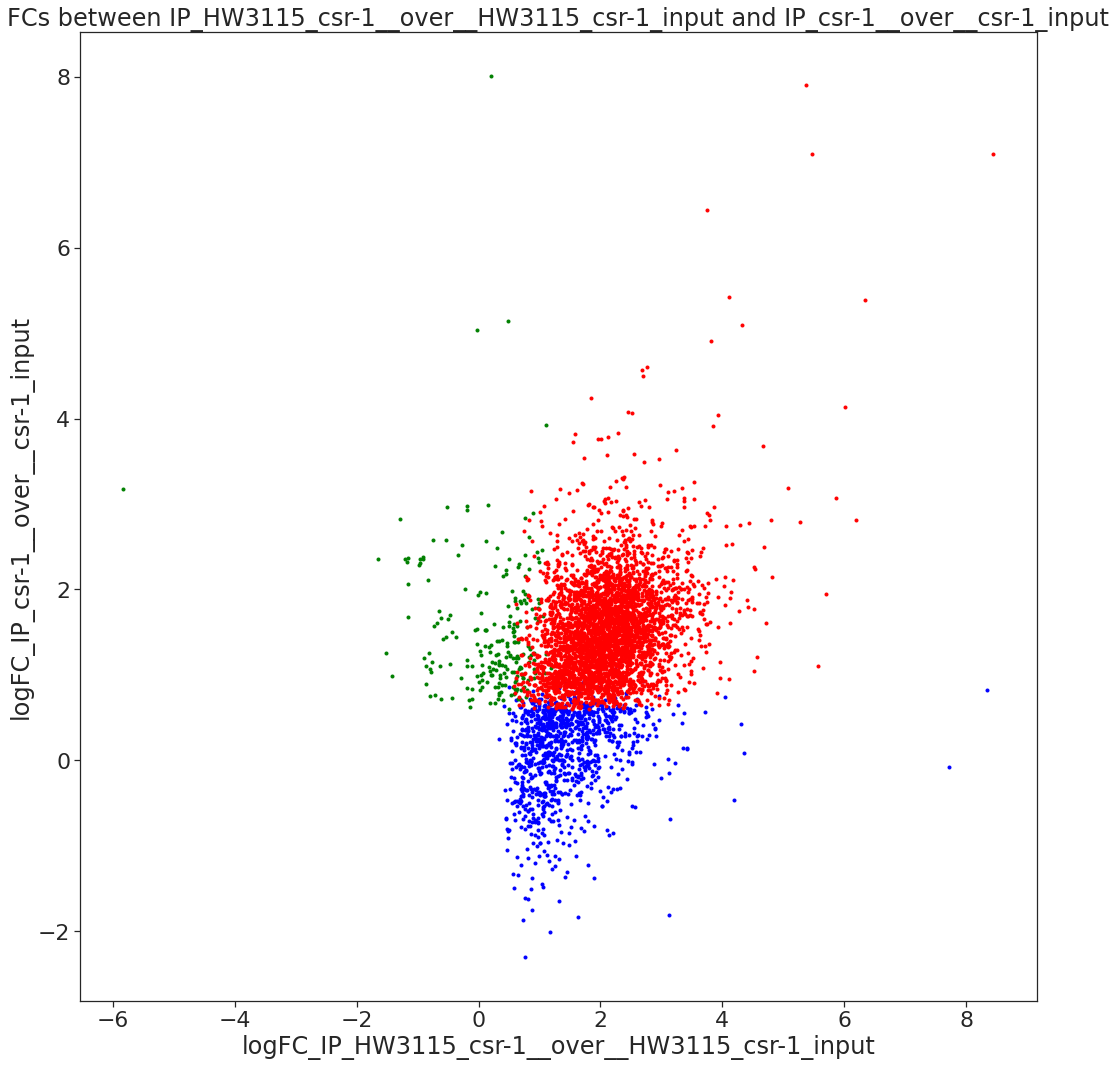

In [75]:
df_1_path = ip__HW3115_csr_1_input__HW3115_csr_1_IP_path
df_1_name = ip__HW3115_csr_1_input__HW3115_csr_1_IP_name

df_2_path = ip__csr_1_input__csr_1_IP_path
df_2_name = ip__csr_1_input__csr_1_IP_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name, how="inner")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"

df_all.loc[df_all[f"FDR_{df_1_name}"].isna(), f"FDR_{df_1_name}"] = 1
df_all.loc[df_all[f"logFC_{df_1_name}"].isna(), f"logFC_{df_1_name}"] = 0
df_all.loc[df_all[f"FDR_{df_2_name}"].isna(), f"FDR_{df_2_name}"] = 1
df_all.loc[df_all[f"logFC_{df_2_name}"].isna(), f"logFC_{df_2_name}"] = 0

print(pd.DataFrame(df_all["Significant"].value_counts()))

# df_all["Significant"] = "No"

# df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]<0) &
#            (df_all[f"FDR_{df_2_name}"]<0.05) &
#            (df_all[f"logFC_{df_2_name}"]<0),
#             "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all[df_all["Significant"] != "No"],
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"],
                      palette=["black", "blue", "green", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
# sns_plot.set(xlim=xlim, ylim=ylim)


# plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

# print("*"*80)
# print(pd.DataFrame(df_all["Significant"].value_counts()))
# print("*"*80)

# point 9. HW3134 bound to WAGO-1 bound in exp 2275R

********************************************************************************
                                                                                                                                                                                                                     Significant
FDR_IP_HW3134_wago-1_wago-3__over__HW3134_wago-1_wago-3_input<0.05\nlogFC_IP_HW3134_wago-1_wago-3__over__HW3134_wago-1_wago-3_input>0\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05nlogFC_IP_WAGO-1__over__Input_WAGO-1>0  3615       
No                                                                                                                                                                                                                   3279       
FDR_IP_HW3134_wago-1_wago-3__over__HW3134_wago-1_wago-3_input<0.05\nlogFC_IP_HW3134_wago-1_wago-3__over__HW3134_wago-1_wago-3_input>0                                                                                540        
FDR_IP_WAGO-1__over

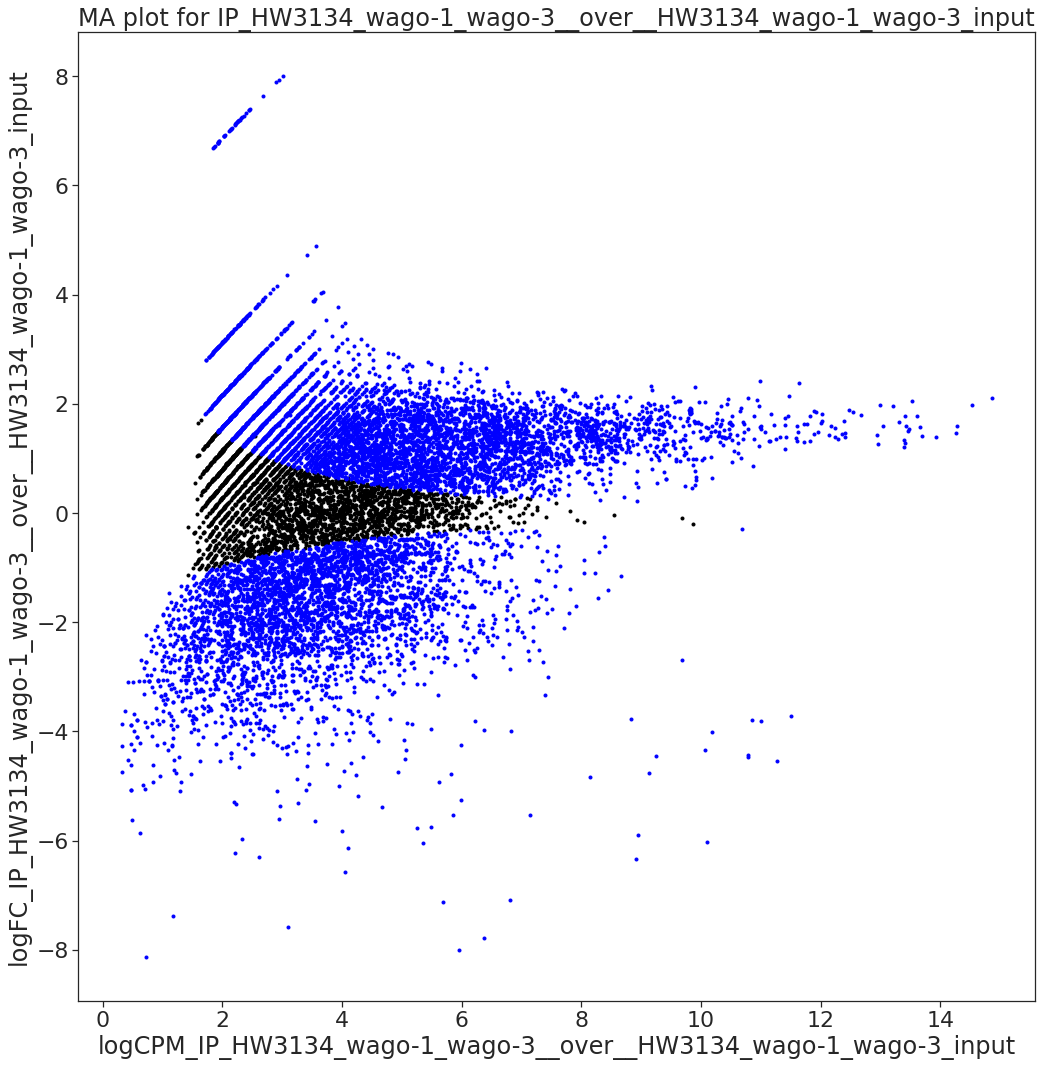

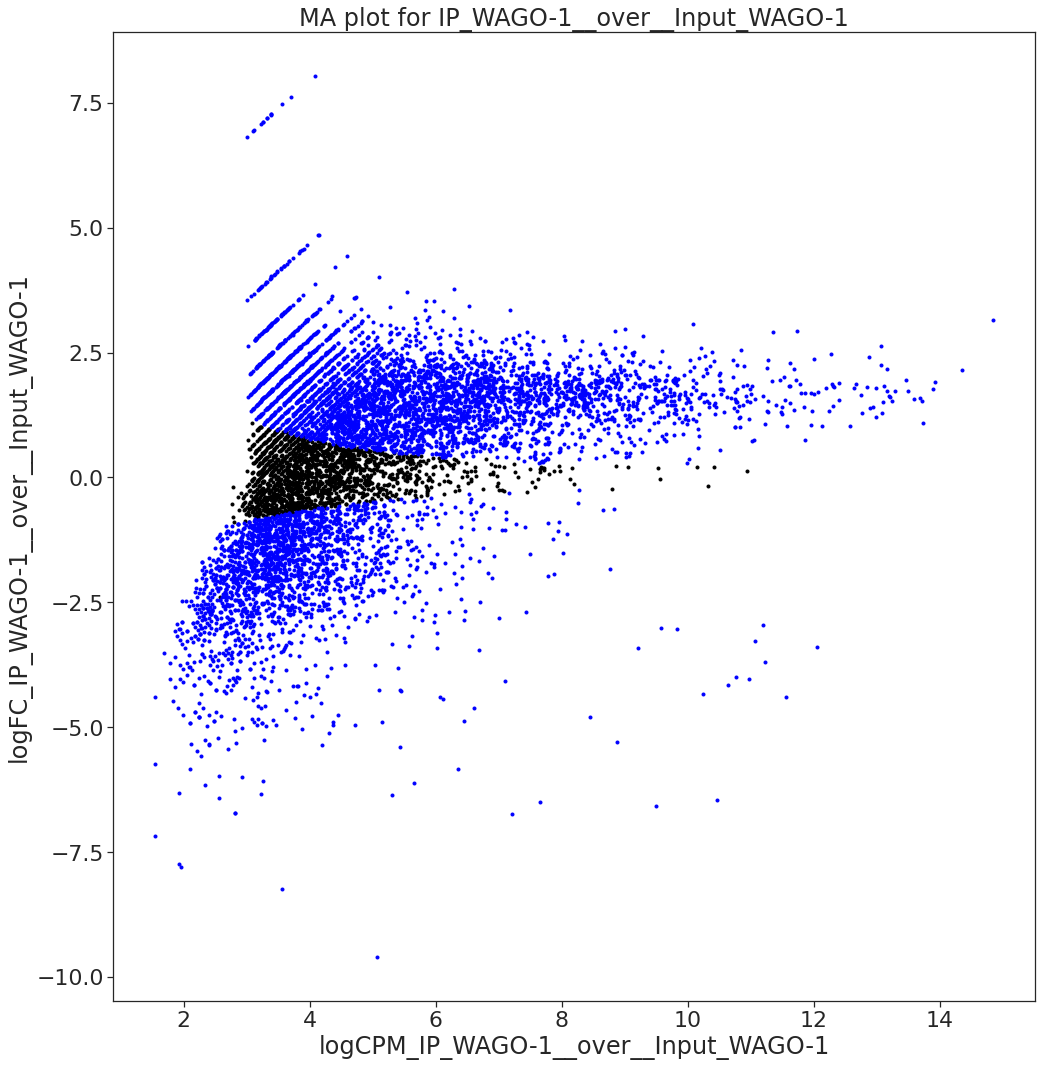

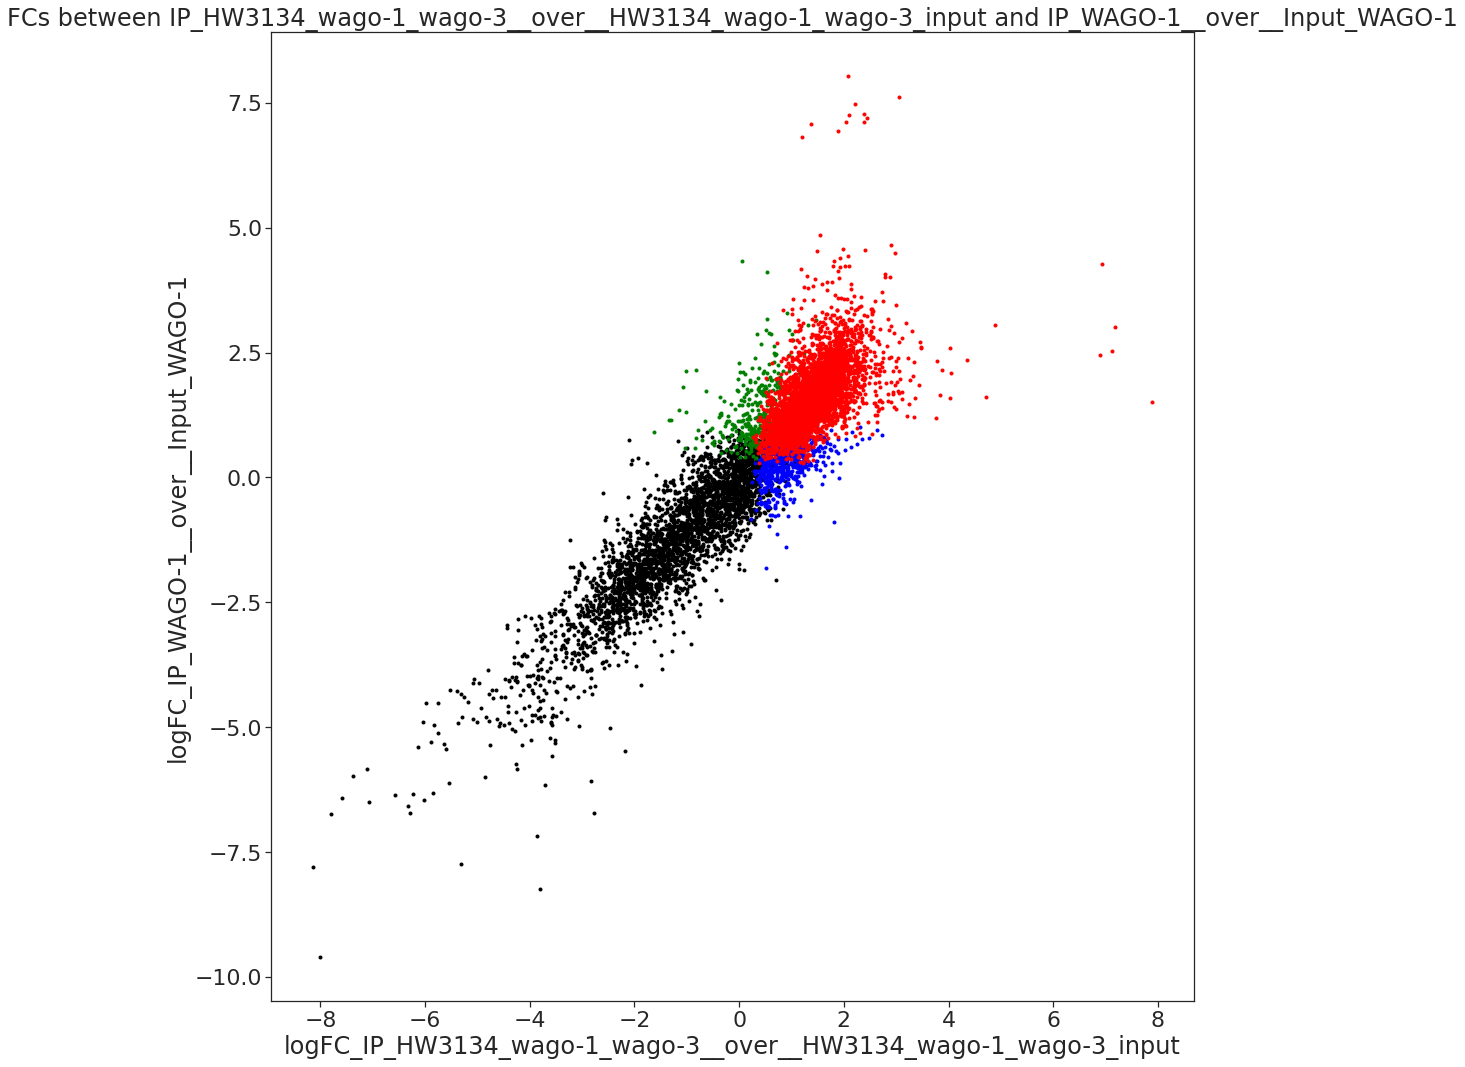

In [20]:
df_1_path = ip__HW3134_wago_1_wago_3_input__HW3134_wago_1_wago_3_IP_path
df_1_name = ip__HW3134_wago_1_wago_3_input__HW3134_wago_1_wago_3_IP_name

df_2_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_2_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

# df_all["Significant"] = "No"

# df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]<0) &
#            (df_all[f"FDR_{df_2_name}"]<0.05) &
#            (df_all[f"logFC_{df_2_name}"]<0),
#             "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"],
                      palette=["black", "blue", "green", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
# sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

# print("*"*80)
# print(pd.DataFrame(df_all["Significant"].value_counts()))
# print("*"*80)

# point 10. HW3135 bound to WAGO-1 bound in exp 2275R

********************************************************************************
                                                    Significant
FDR_IP_HW3135_wago-1_wago-3__over__HW3135_wago-...         3561
No                                                         2917
FDR_IP_HW3135_wago-1_wago-3__over__HW3135_wago-...          813
FDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_I...          367


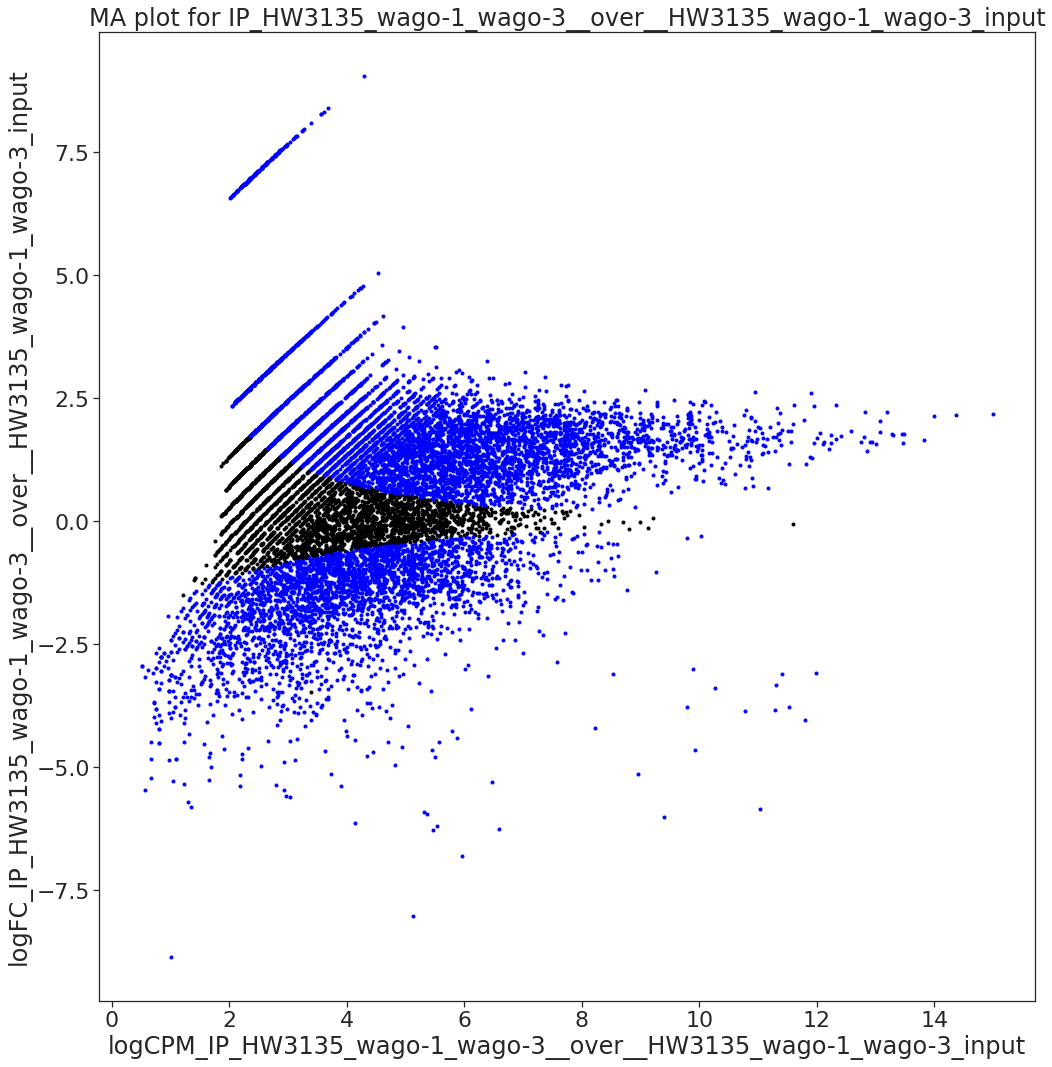

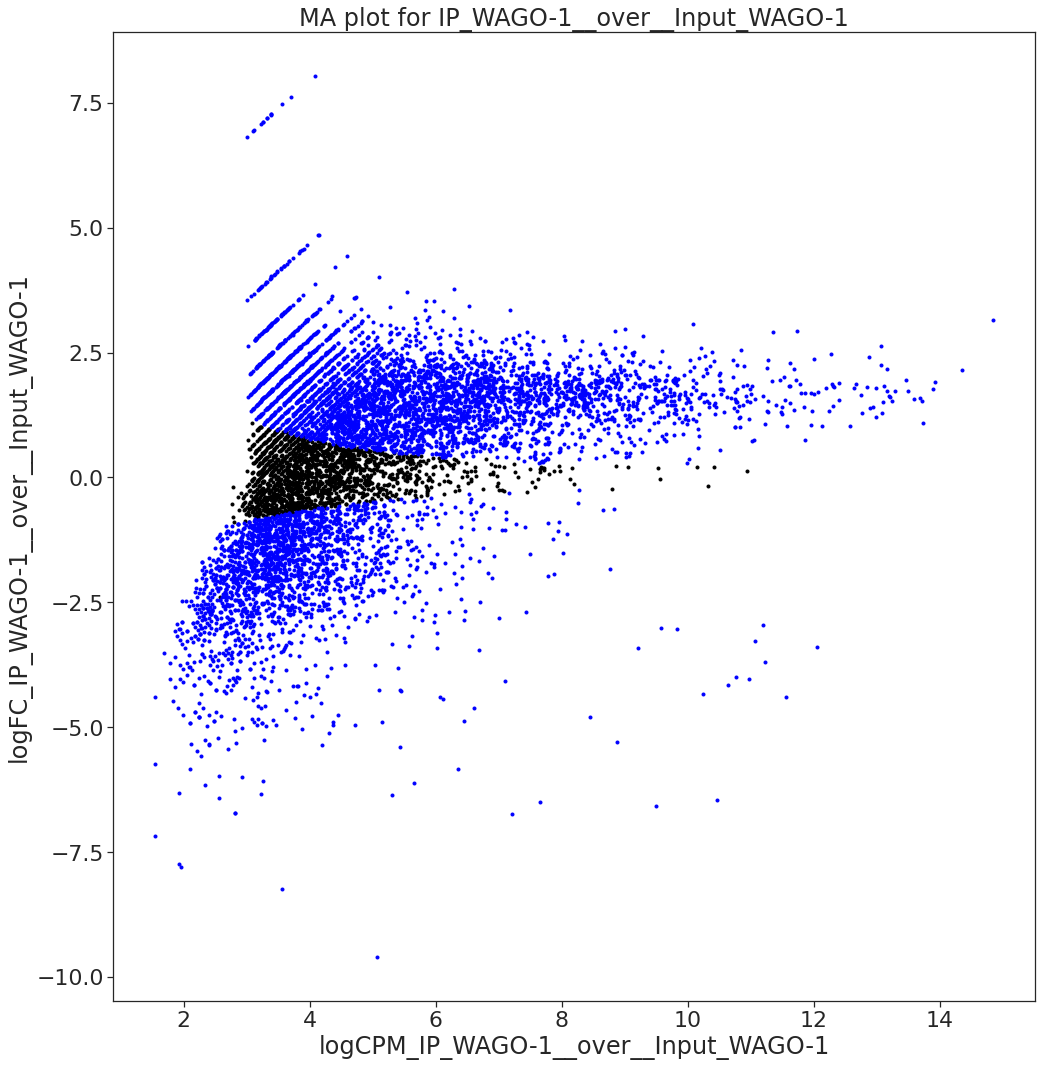

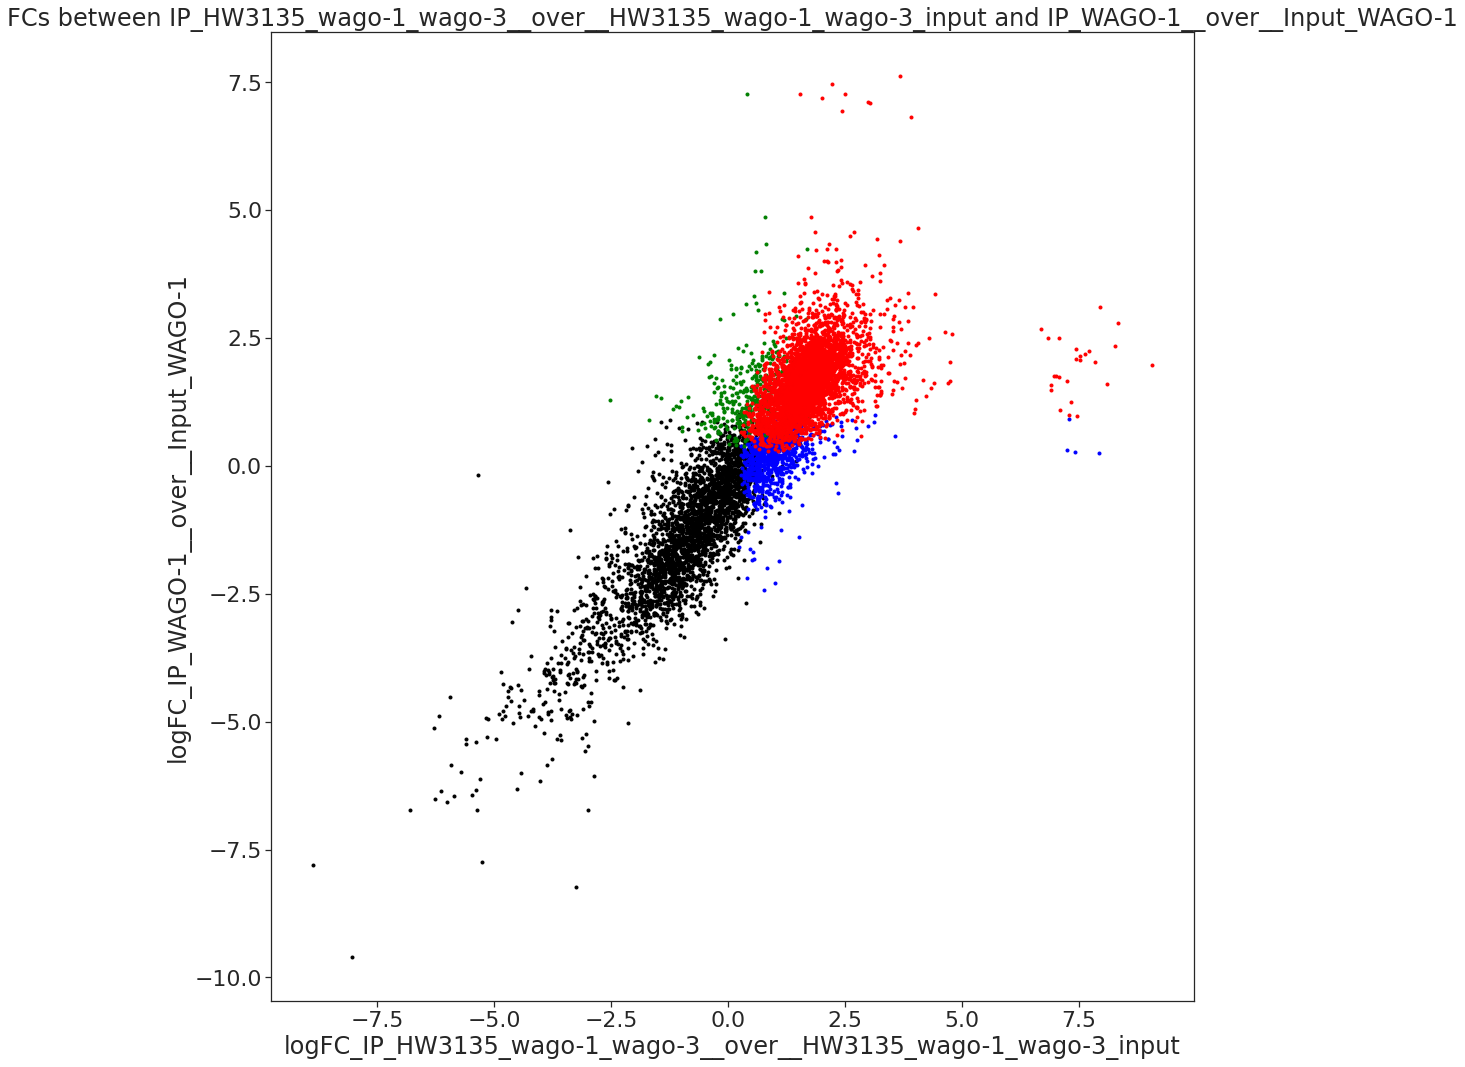

In [76]:
df_1_path = ip__HW3135_wago_1_wago_3_input__HW3135_wago_1_wago_3_IP_path
df_1_name = ip__HW3135_wago_1_wago_3_input__HW3135_wago_1_wago_3_IP_name

df_2_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_2_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name, how="inner")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

# df_all["Significant"] = "No"

# df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]<0) &
#            (df_all[f"FDR_{df_2_name}"]<0.05) &
#            (df_all[f"logFC_{df_2_name}"]<0),
#             "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"],
                      palette=["black", "blue", "green", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
# sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

# print("*"*80)
# print(pd.DataFrame(df_all["Significant"].value_counts()))
# print("*"*80)

# point 11. HW3134 bound to WAGO-1 dpf-3null bound in exp 2275R

********************************************************************************
                                                    Significant
No                                                         4689
FDR_IP_HW3134_wago-1_wago-3__over__HW3134_wago-...         4025
FDR_IP_HW3134_wago-1_wago-3__over__HW3134_wago-...          810
FDR_IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dp...          626


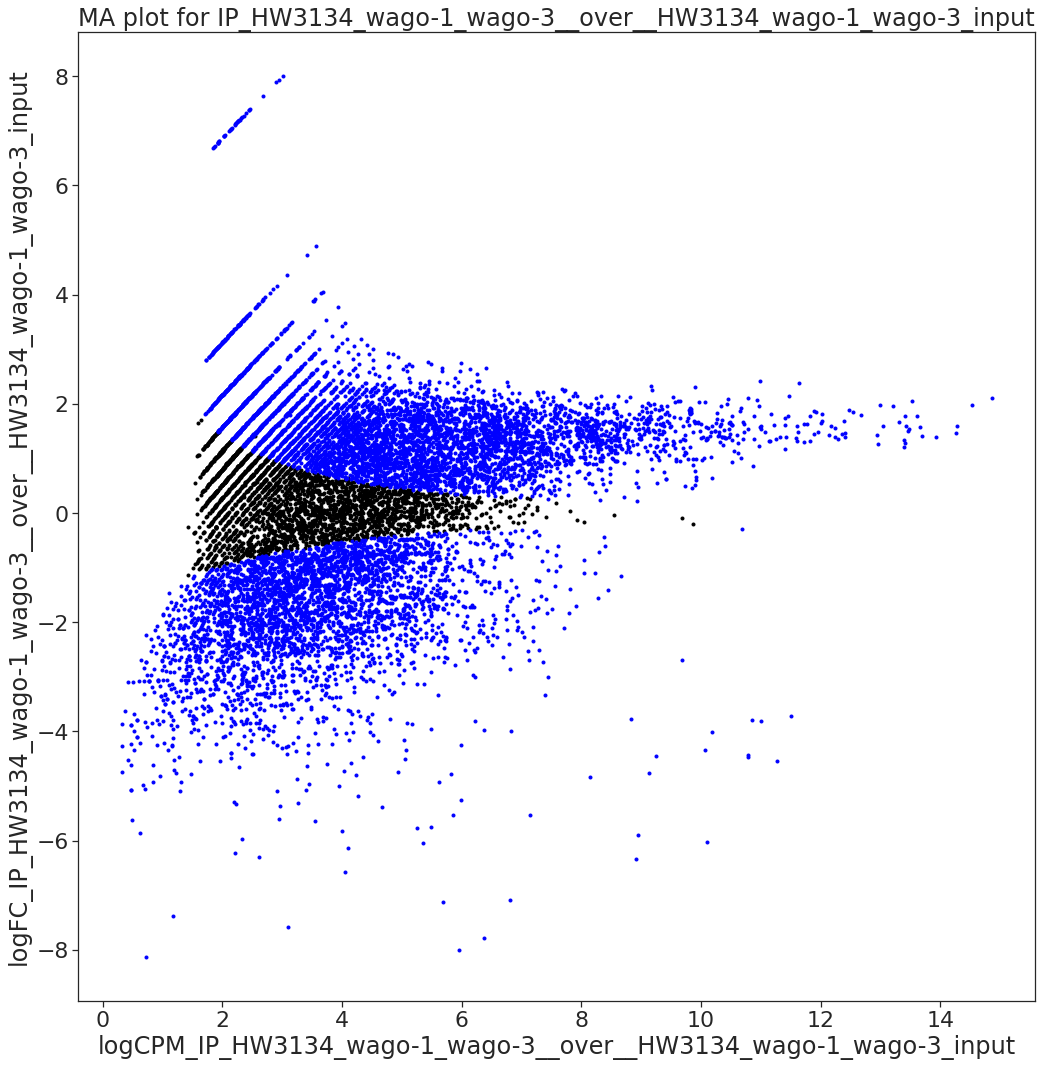

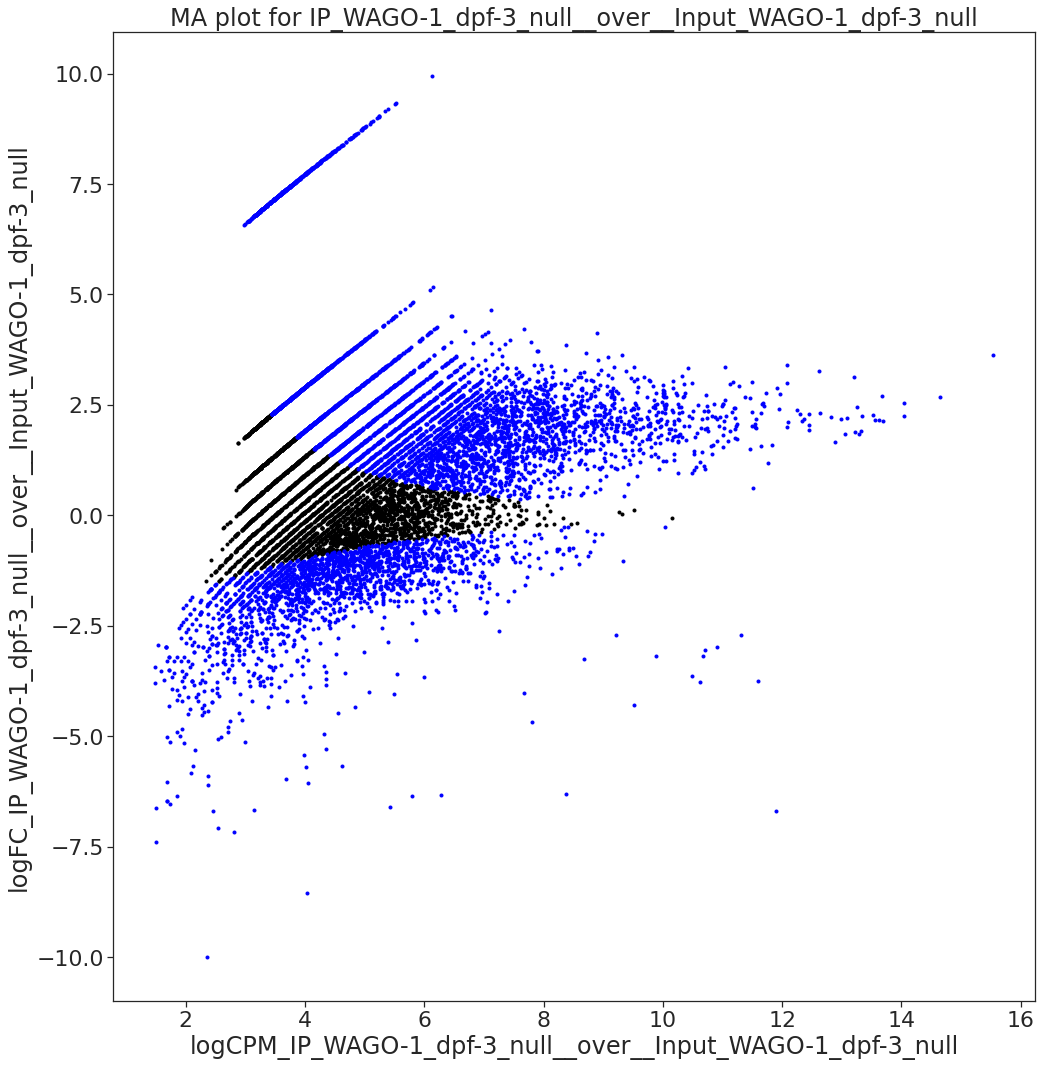

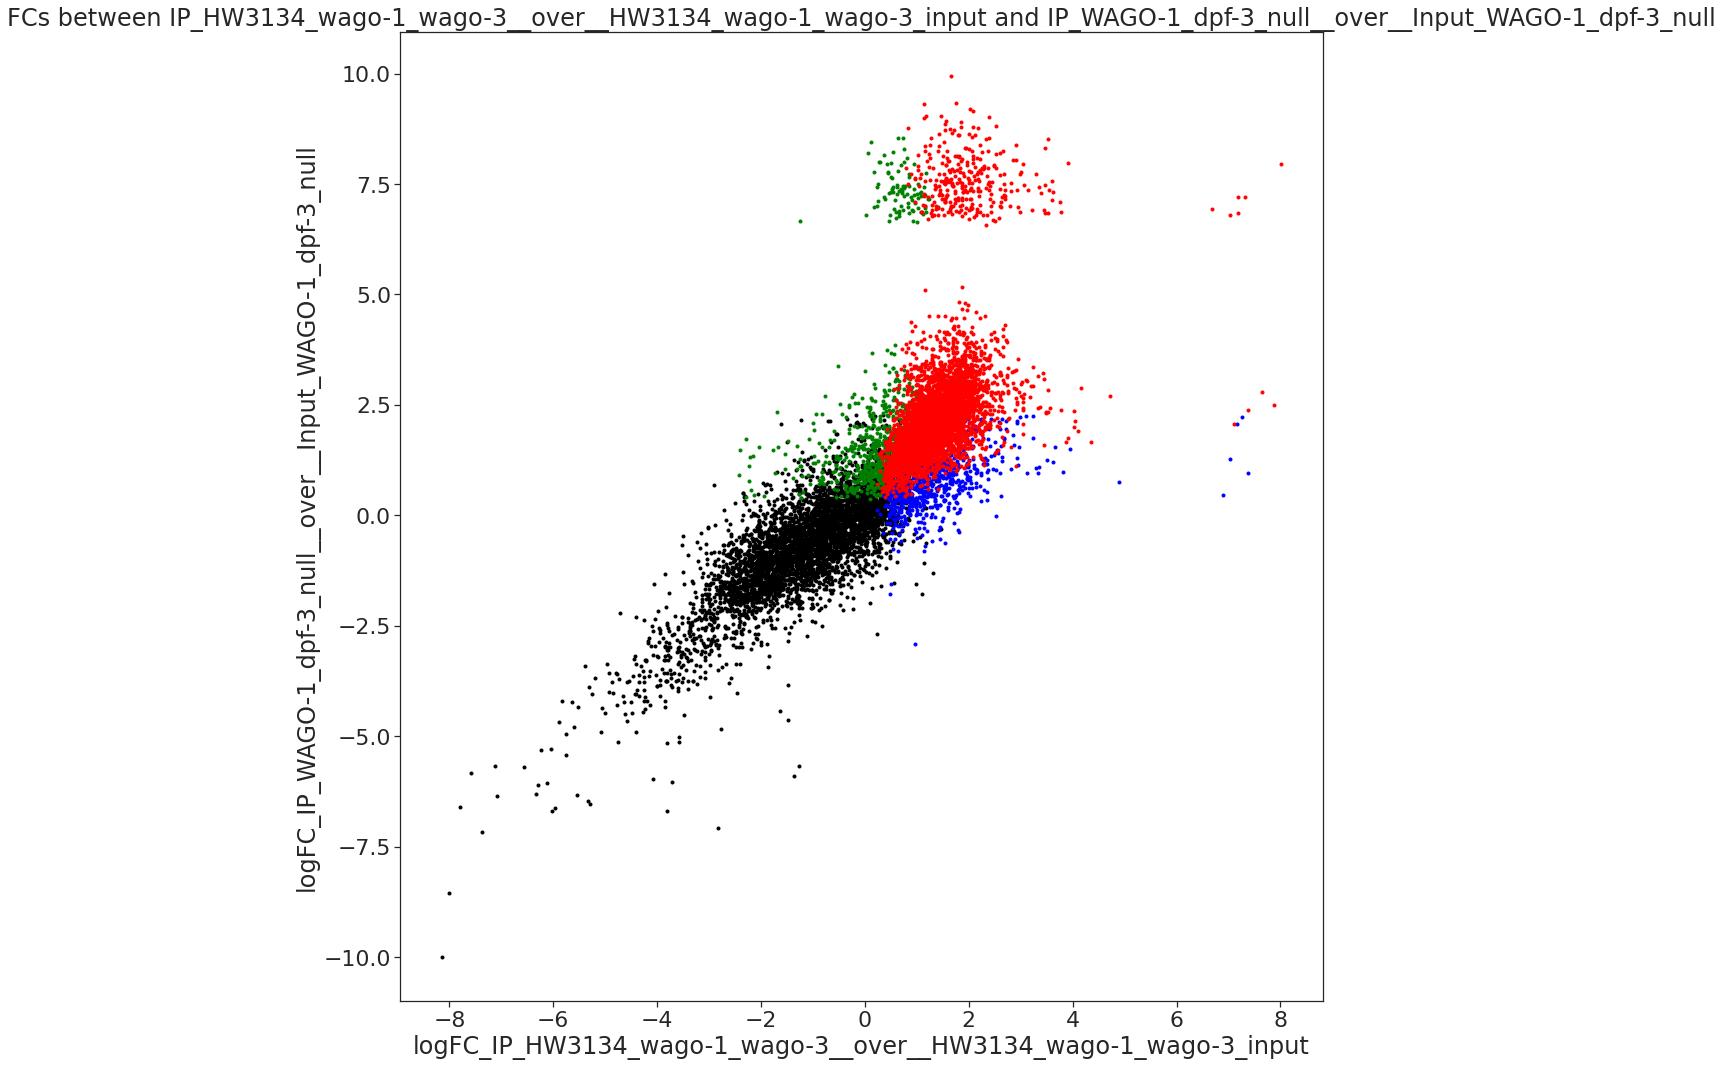

In [77]:
df_1_path = ip__HW3134_wago_1_wago_3_input__HW3134_wago_1_wago_3_IP_path
df_1_name = ip__HW3134_wago_1_wago_3_input__HW3134_wago_1_wago_3_IP_name

df_2_path = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_path
df_2_name = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name, how="inner")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

# df_all["Significant"] = "No"

# df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]<0) &
#            (df_all[f"FDR_{df_2_name}"]<0.05) &
#            (df_all[f"logFC_{df_2_name}"]<0),
#             "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"],
                      palette=["black", "blue", "green", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
# sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

# print("*"*80)
# print(pd.DataFrame(df_all["Significant"].value_counts()))
# print("*"*80)

# point 12. HW3135 bound to WAGO-1 dpf-3null bound in exp 2275R

********************************************************************************
                                                    Significant
No                                                         4573
FDR_IP_HW3135_wago-1_wago-3__over__HW3135_wago-...         4279
FDR_IP_HW3135_wago-1_wago-3__over__HW3135_wago-...         1057
FDR_IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dp...          400


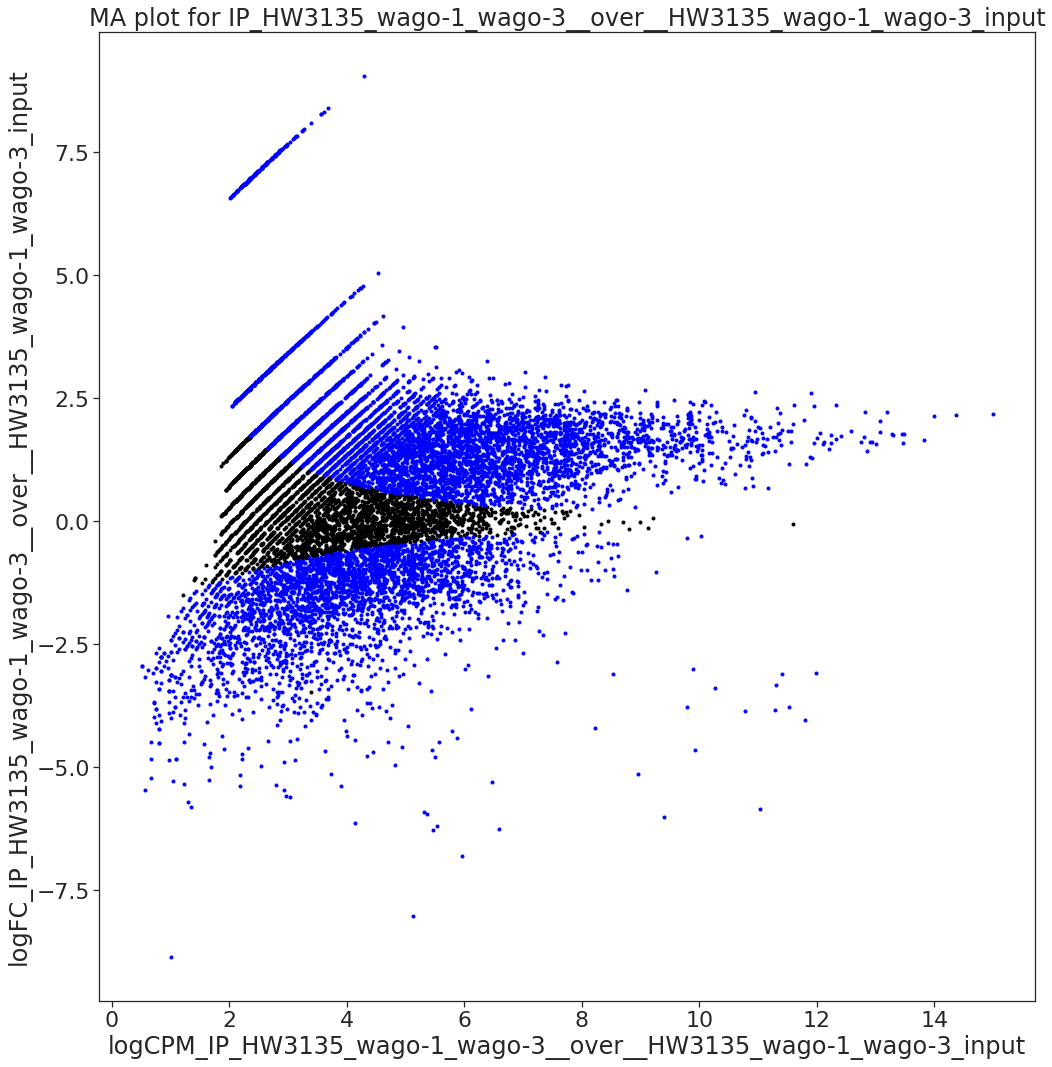

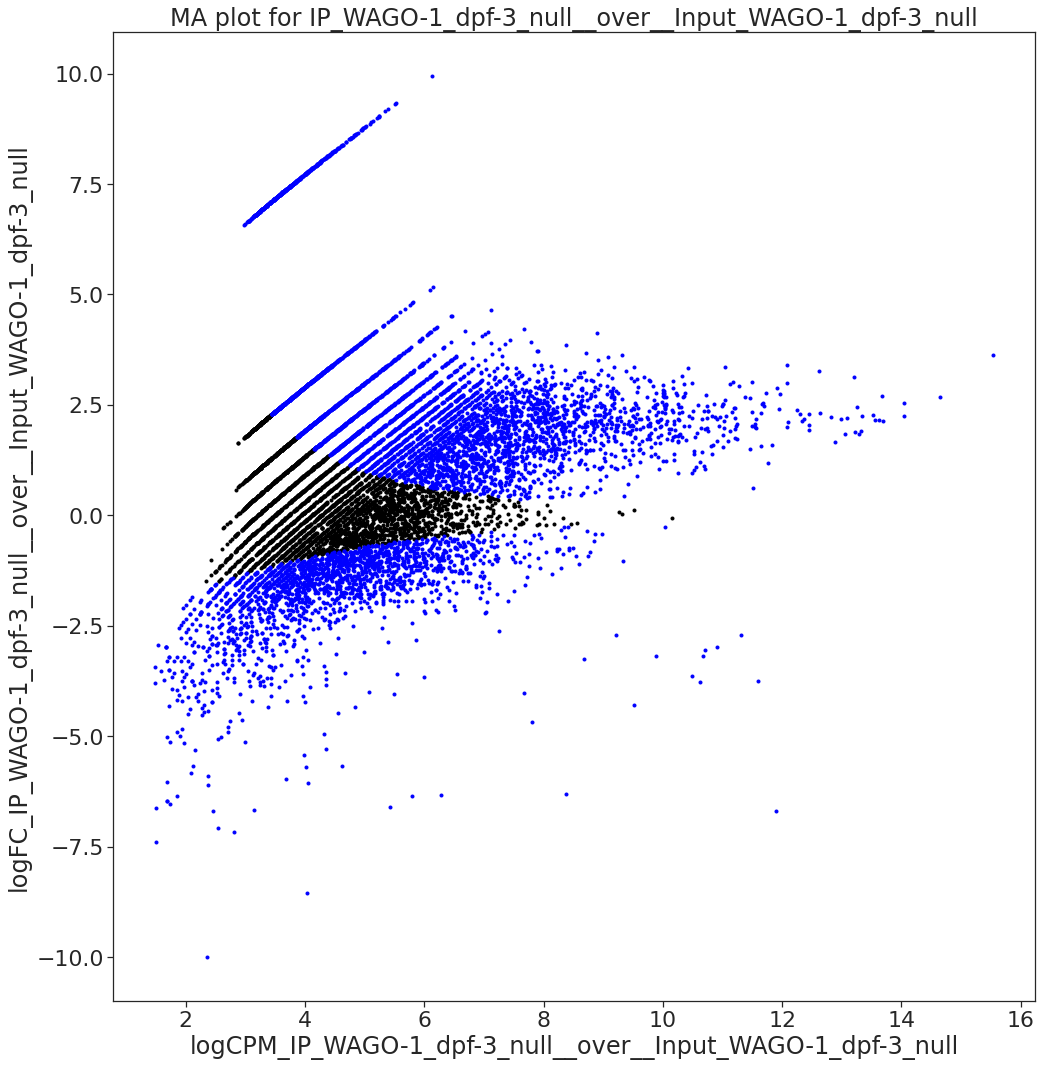

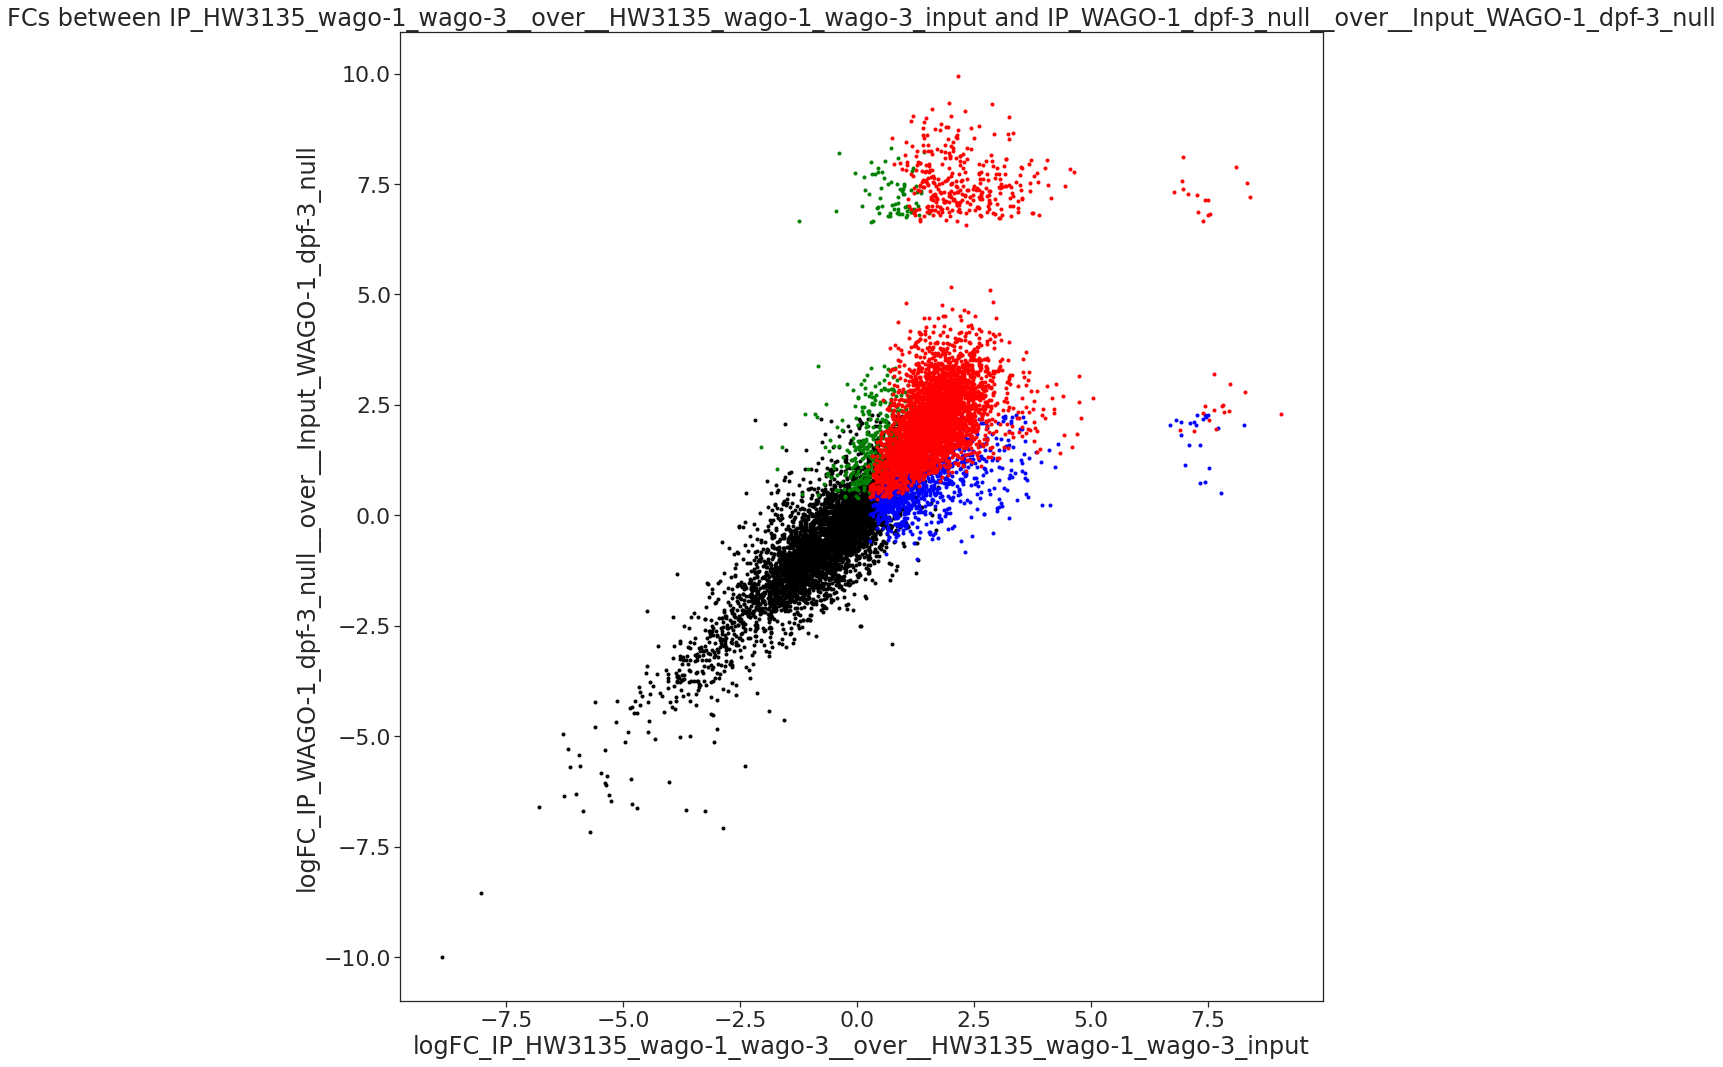

In [78]:
df_1_path = ip__HW3135_wago_1_wago_3_input__HW3135_wago_1_wago_3_IP_path
df_1_name = ip__HW3135_wago_1_wago_3_input__HW3135_wago_1_wago_3_IP_name

df_2_path = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_path
df_2_name = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name, how="inner")

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"

print("*"*80)
print(pd.DataFrame(df_all["Significant"].value_counts()))

# df_all["Significant"] = "No"

# df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
#            (df_all[f"logFC_{df_1_name}"]<0) &
#            (df_all[f"FDR_{df_2_name}"]<0.05) &
#            (df_all[f"logFC_{df_2_name}"]<0),
#             "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}<0"


sns_plot = sns.lmplot(f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05nlogFC_{df_2_name}>0"],
                      palette=["black", "blue", "green", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
# sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"FC_vs_FC__{df_1_name}__vs__{df_2_name}.pdf")

# print("*"*80)
# print(pd.DataFrame(df_all["Significant"].value_counts()))
# print("*"*80)

# Discussion with Rajani on 10.08.2020